Epoch 0, Loss: 863.076171875
Epoch 100, Loss: 469.52996826171875
Epoch 200, Loss: 270.7857360839844
Epoch 300, Loss: 145.5522003173828
Epoch 400, Loss: 73.90066528320312
Epoch 500, Loss: 36.772743225097656
Epoch 600, Loss: 19.475095748901367
Epoch 700, Loss: 12.273938179016113
Epoch 800, Loss: 9.60519790649414
Epoch 900, Loss: 8.725083351135254


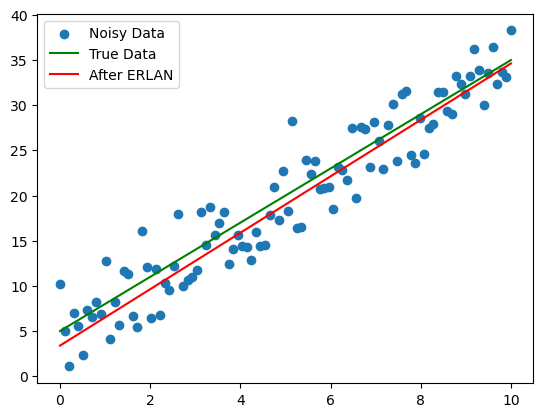

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Enhanced Regression Layers for Adaptive Noise filtering (ERLAN)
class ERLAN(nn.Module):
    def __init__(self, input_size, num_layers=5):
        super(ERLAN, self).__init__()
        self.layers = nn.ModuleList()
        
        # Adding multiple linear layers
        for _ in range(num_layers):
            self.layers.append(nn.Linear(input_size, input_size))
        
        self.output_layer = nn.Linear(input_size, 1)  # Output layer
        self.activation = nn.ReLU()  # Activation function

    def forward(self, x):
        residual = x  # Store the input data for residual connection
        
        for layer in self.layers:
            x = self.activation(layer(x))  # Linear transformation + ReLU activation
            x = x + residual  # Residual connection
        
        return self.output_layer(x)  # Final output layer

# Generate linear data
X = np.linspace(0, 10, 100)
y = 3 * X + 5  # Simple linear relation

# Add noise to the data
noise = np.random.normal(0, 3, size=y.shape)  
y_noisy = y + noise  # Noisy data

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)  
y_tensor = torch.tensor(y_noisy, dtype=torch.float32).unsqueeze(1)  

# Create and train the ERLAN model
model = ERLAN(input_size=1, num_layers=5)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = loss_fn(output, y_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate the model and remove noise
with torch.no_grad():
    denoised = model(X_tensor).numpy()

# Plot the results
plt.scatter(X, y_noisy, label="Noisy Data")
plt.plot(X, y, label="True Data", color="green")
plt.plot(X, denoised, label="After ERLAN", color="red")
plt.legend()
plt.show()

